In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset into the df dataframe 
df = pd.read_csv('synthetic_fraud_dataset.csv')
df.head()  #displaying first five(5)rows 

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
#displaying the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [4]:
#displaying the statistical information
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,50000.0,99.411012,98.687292,0.0000,28.6775,69.66000,138.852500,1174.14
Account_Balance,50000.0,50294.065981,28760.458557,500.4800,25355.9950,50384.43000,75115.135000,99998.31
IP_Address_Flag,50000.0,0.050200,0.218360,0.0000,0.0000,0.00000,0.000000,1.00
Previous_Fraudulent_Activity,50000.0,0.098400,0.297858,0.0000,0.0000,0.00000,0.000000,1.00
Daily_Transaction_Count,50000.0,7.485240,4.039637,1.0000,4.0000,7.00000,11.000000,14.00
Avg_Transaction_Amount_7d,50000.0,255.271924,141.382279,10.0000,132.0875,256.08500,378.032500,500.00
Failed_Transaction_Count_7d,50000.0,2.003540,1.414273,0.0000,1.0000,2.00000,3.000000,4.00
Card_Age,50000.0,119.999940,68.985817,1.0000,60.0000,120.00000,180.000000,239.00
Transaction_Distance,50000.0,2499.164155,1442.013834,0.2500,1256.4975,2490.78500,3746.395000,4999.93
Risk_Score,50000.0,0.501556,0.287774,0.0001,0.2540,0.50225,0.749525,1.00


#### The Statistical information of our data above shows that the hightest transaction amount madde is 1,174.14,while the account with highest balance holds 99,998.31 and also the maximum average amount of transaction for the last 7 days is 500, while the maximum failed transaction count for the past 7days is 4 times

In [5]:
#checking for any missing values in the data 
df.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

##### the above shows that there is no missing values 

In [6]:
#checking for duplicates
df.duplicated().sum()

0

### Exploratory Data Analysis

<Axes: xlabel='Fraud_Label', ylabel='count'>

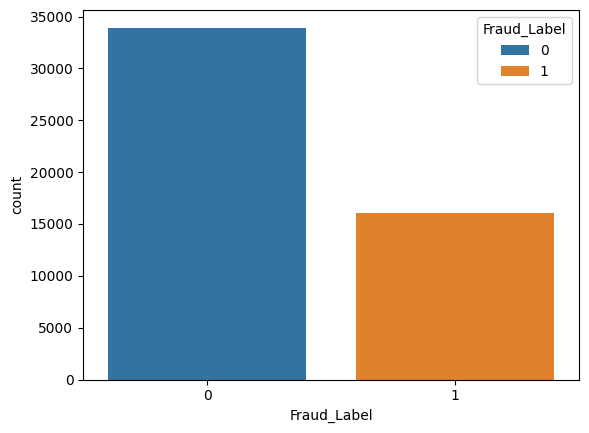

In [7]:
#countplot on fraud label colum
sns.countplot(x='Fraud_Label', data = df, hue='Fraud_Label')

<Axes: xlabel='Fraud_Label', ylabel='Transaction_Amount'>

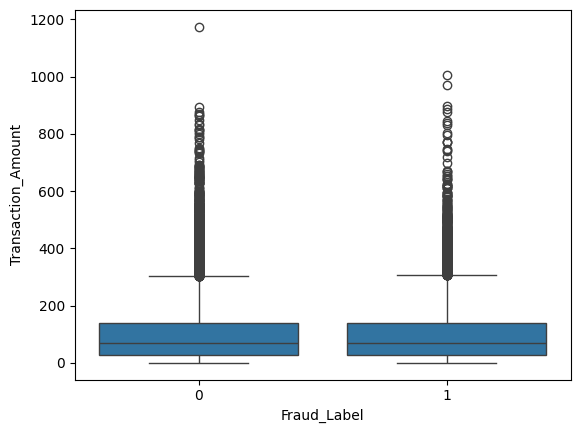

In [8]:
#using boxplot to spot the differences in medin, spread, and outliers  by comparing the transaction amount vs fraud_label
sns.boxplot(x='Fraud_Label', y='Transaction_Amount', data=df)

##### The Boxplot above shows that both categories have similar medians around 100, indicting that typical transaction amount dont differ drastically, between fraud and non_fraud cases while the IQR suggest that the variablity in trasaction amount is similar across fraud labels and also there are numerous outliers in both cases hinting that fraud may often invlove unusually high amounts.

In [9]:
#checking the correlation between the numerical columns and the fraud_label column
num_df = df.select_dtypes(include=['number'])
corr_matrix = num_df.corr()
corr_matrix

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
Transaction_Amount,1.000000,-0.002380,-0.001620,0.001668,0.002149,-0.006255,0.001247,0.002294,0.007935,0.005606,0.001348,0.001901
Account_Balance,-0.002380,1.000000,-0.001210,-0.002314,0.006041,-0.001738,-0.000186,0.000717,0.001748,-0.005262,0.000557,-0.003153
IP_Address_Flag,-0.001620,-0.001210,1.000000,-0.008298,0.001815,-0.004845,0.010370,-0.003143,-0.003941,-0.004064,0.004979,0.003028
Previous_Fraudulent_Activity,0.001668,-0.002314,-0.008298,1.000000,0.000492,0.001600,-0.000352,-0.006713,0.005740,-0.002815,-0.000473,-0.000718
Daily_Transaction_Count,0.002149,0.006041,0.001815,0.000492,1.000000,0.004882,-0.007820,-0.001516,-0.001842,-0.007572,-0.006148,-0.007065
Avg_Transaction_Amount_7d,-0.006255,-0.001738,-0.004845,0.001600,0.004882,1.000000,0.006583,-0.008735,-0.003066,0.004977,0.007762,0.000703
Failed_Transaction_Count_7d,0.001247,-0.000186,0.010370,-0.000352,-0.007820,0.006583,1.000000,-0.004570,-0.006997,0.000814,-0.003335,0.509871
Card_Age,0.002294,0.000717,-0.003143,-0.006713,-0.001516,-0.008735,-0.004570,1.000000,-0.003339,-0.001385,0.003406,-0.003120
Transaction_Distance,0.007935,0.001748,-0.003941,0.005740,-0.001842,-0.003066,-0.006997,-0.003339,1.000000,-0.001902,-0.010592,-0.000116
Risk_Score,0.005606,-0.005262,-0.004064,-0.002815,-0.007572,0.004977,0.000814,-0.001385,-0.001902,1.000000,-0.005236,0.385810


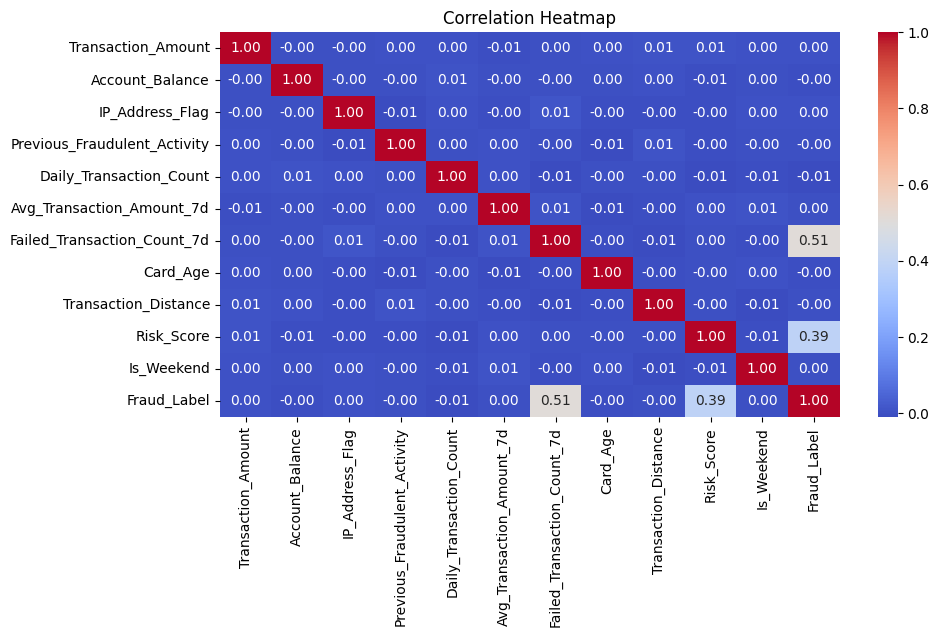

In [10]:
#visualising the correlation using heatmap

# Create heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### based on the aaabove heat visualisation, failed_transacount_count_7d tends to be more correlated to the fraud label follow by risk_score


C:\Users\DAN TECH\AppData\Local\Temp\ipykernel_13172\3064372603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fraud_Label', y='Failed_Transaction_Count_7d', palette='Set2')


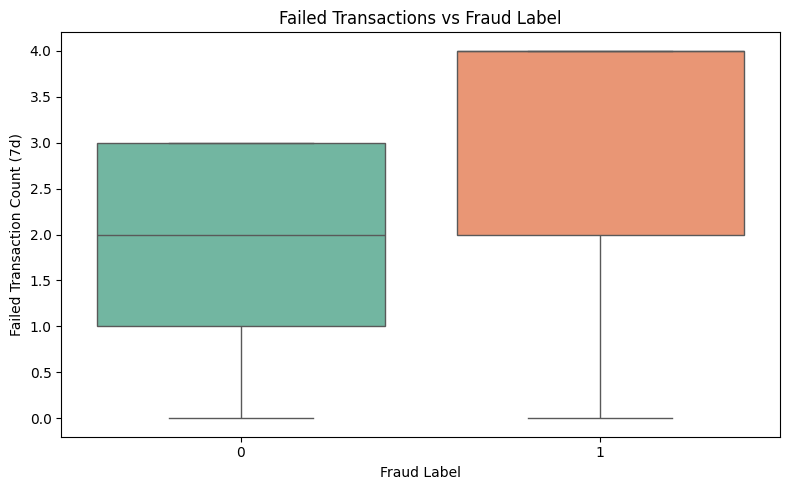

In [11]:
#visualising and quantifing the relationship between the strongest signal(failed_transaction_count_7d) with fraud
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Fraud_Label', y='Failed_Transaction_Count_7d', palette='Set2')
plt.title('Failed Transactions vs Fraud Label')
plt.xlabel('Fraud Label')
plt.ylabel('Failed Transaction Count (7d)')
plt.tight_layout()
plt.show()

##### from the above boxplot Fraud label 1(Fraudlent) shows a higher median and wider spread of failed transactions suggesting that fraudsters tend to fail more often before succeeding. possibly due to: incorrect credentails, Blocked cards, Velocity limits or Suspicious behaviour triggering soft decline. now the question is: what do those failed transactions look like?

In [12]:
#filtering for only fraudulent cases
fraud_cases = df[df['Fraud_Label'] == 1]
#creating a subset of failed transactions
failed_trans = fraud_cases[fraud_cases['Failed_Transaction_Count_7d']>0]

In [13]:
failed_trans

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
7,TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0,...,3,164.38,4,Discover,182,1764.66,Biometric,0.5326,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,TXN_2433,USER_3990,8.44,POS,2023-10-24 19:27:00,96536.12,Laptop,London,Travel,0,...,13,326.71,3,Visa,159,940.42,Biometric,0.9602,0,1
49993,TXN_16850,USER_4192,202.66,Bank Transfer,2023-04-18 09:22:00,98989.44,Laptop,London,Groceries,0,...,6,366.35,4,Visa,195,1939.25,Password,0.3458,1,1
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


#### Curiosity insight i would be attempting below: 
##### Are failed attempts unusually high or low?
##### Are they coming from suspicious or flagged Ips?
##### are failures clustering on weekends or off_hours?
##### are newer cards failing more ?
##### are failed attempts happening far from the account's usual location ?


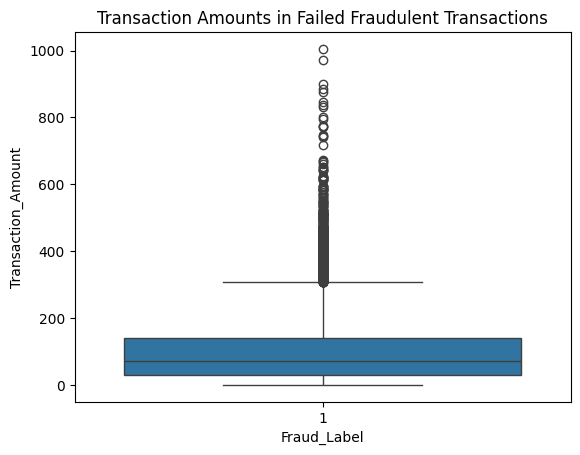

In [14]:
# Transaction Amount Distribution
sns.boxplot(data=failed_trans, x='Fraud_Label', y='Transaction_Amount')
plt.title('Transaction Amounts in Failed Fraudulent Transactions')
plt.show()

In [15]:
# Suspicious IP Address Flag
ip_flag_rate = failed_trans['IP_Address_Flag'].value_counts(normalize=True)
print("Suspicious IP Rate:\n", ip_flag_rate)

Suspicious IP Rate:
 IP_Address_Flag
0    0.948021
1    0.051979
Name: proportion, dtype: float64


In [16]:
# Weekend vs Weekday Distribution
weekend_rate = failed_trans['Is_Weekend'].value_counts(normalize=True)
print("Weekend Failure Rate:\n", weekend_rate)

Weekend Failure Rate:
 Is_Weekend
0    0.701067
1    0.298933
Name: proportion, dtype: float64


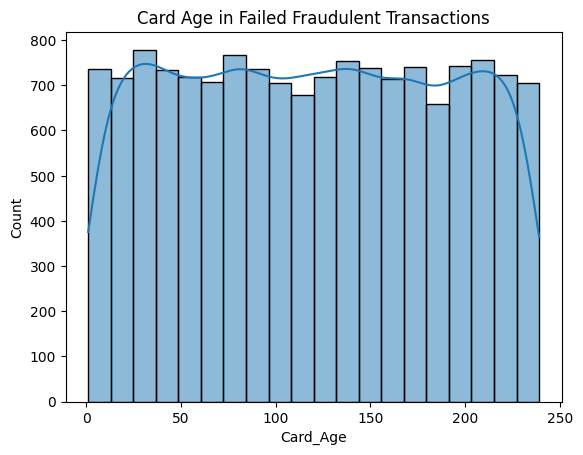

In [17]:
# Card Age Distribution
sns.histplot(failed_trans['Card_Age'], bins=20, kde=True)
plt.title('Card Age in Failed Fraudulent Transactions')
plt.show()

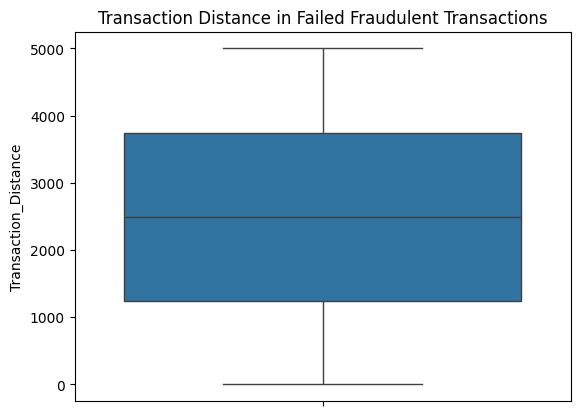

In [18]:
# Transaction Distance
sns.boxplot(data=failed_trans, y='Transaction_Distance')
plt.title('Transaction Distance in Failed Fraudulent Transactions')
plt.show()

##### insight gotten from the amount in failed fraudulent transaction involves modest amounts, theres a significant tail of high value outliers. suggesting that fraudsters may be probing the system with small amounts before attempting larger, riskier transactions, some high value fraud fail due to system defense kicking in.
##### now the Ips shows that only 5.2% of failed transactions came from suspicious IPs, meaning that most failed fraud attempts(94.8%) are from Ips not flagged as suspicious, which could imply that fraudsters are using clean or previously unflagged Ips to aviod detection.
##### And also about 70.1% of failed fraud transactions happens on the weekdays while fewer fraud failure of about 29.9% occurs on weekends, suggesting that fraudsters may be more active and likely to be caught during the workweek and this also reflect system monitoring patterns or user behavior differences across days. this leave me with a questions are fraud detection systems equally robust on weekends?? if not, that might explain the lower weekend failure rate.
##### And also there is higher concentration of failed fraudulent transactions among newer cards, as card age increases, the frequency of failed fraud attempt tapers off, suggesting that fraudsters prefer targeting newer cards possibly because new cards may have fewer transaction histories, making anomalies harder to detect. or maybe users may not have set up full security features yet.

### Feature Engineering


In [19]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [20]:
df.drop(['Transaction_ID','User_ID'],axis = 1, inplace=True)

In [21]:
df.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Timestamp',
       'Account_Balance', 'Device_Type', 'Location', 'Merchant_Category',
       'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [22]:
#extracting the day, month, and hour from the timestamp column
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)


In [23]:
#Extract day/night flag
df['Is_Night'] = df['Hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

In [24]:
df

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,...,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Hour,Day_of_Week,Month,Is_Night
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,...,65,883.17,Biometric,0.8494,0,0,19,0,8,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,...,186,2203.36,Password,0.0959,0,1,4,2,6,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,...,226,1909.29,Biometric,0.8400,0,1,15,1,6,0
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,...,76,1311.86,OTP,0.7935,0,1,0,3,12,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,...,140,966.98,Password,0.3819,1,1,23,5,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,0,2,...,98,1537.54,PIN,0.1493,1,0,18,6,1,0
49996,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,0,13,...,93,2555.72,Biometric,0.3653,0,1,8,1,5,0
49997,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,1,1,...,114,4686.59,Biometric,0.5195,0,0,19,0,1,0
49998,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,0,13,...,72,4886.92,Biometric,0.7063,0,1,19,3,3,0


In [25]:
#dropping the location column
df= df.drop('Location', axis=1)

In [26]:
#dropping the Timestamp
df=df.drop('Timestamp', axis =1)

In [27]:
df

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,...,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Hour,Day_of_Week,Month,Is_Night
0,39.79,POS,93213.17,Laptop,Travel,0,0,7,437.63,3,...,65,883.17,Biometric,0.8494,0,0,19,0,8,0
1,1.19,Bank Transfer,75725.25,Mobile,Clothing,0,0,13,478.76,4,...,186,2203.36,Password,0.0959,0,1,4,2,6,1
2,28.96,Online,1588.96,Tablet,Restaurants,0,0,14,50.01,4,...,226,1909.29,Biometric,0.8400,0,1,15,1,6,0
3,254.32,ATM Withdrawal,76807.20,Tablet,Clothing,0,0,8,182.48,4,...,76,1311.86,OTP,0.7935,0,1,0,3,12,1
4,31.28,POS,92354.66,Mobile,Electronics,0,1,14,328.69,4,...,140,966.98,Password,0.3819,1,1,23,5,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Clothing,0,0,2,389.00,3,...,98,1537.54,PIN,0.1493,1,0,18,6,1,0
49996,126.15,POS,28791.75,Mobile,Clothing,0,0,13,434.95,4,...,93,2555.72,Biometric,0.3653,0,1,8,1,5,0
49997,72.02,Online,29916.41,Laptop,Clothing,0,1,1,369.15,2,...,114,4686.59,Biometric,0.5195,0,0,19,0,1,0
49998,64.89,Bank Transfer,67895.67,Mobile,Electronics,0,0,13,242.29,4,...,72,4886.92,Biometric,0.7063,0,1,19,3,3,0


In [28]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [29]:
df_encoded.columns

Index(['Transaction_Amount', 'Account_Balance', 'IP_Address_Flag',
       'Previous_Fraudulent_Activity', 'Daily_Transaction_Count',
       'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Age',
       'Transaction_Distance', 'Risk_Score', 'Is_Weekend', 'Fraud_Label',
       'Hour', 'Day_of_Week', 'Month', 'Is_Night',
       'Transaction_Type_Bank Transfer', 'Transaction_Type_Online',
       'Transaction_Type_POS', 'Device_Type_Mobile', 'Device_Type_Tablet',
       'Merchant_Category_Electronics', 'Merchant_Category_Groceries',
       'Merchant_Category_Restaurants', 'Merchant_Category_Travel',
       'Card_Type_Discover', 'Card_Type_Mastercard', 'Card_Type_Visa',
       'Authentication_Method_OTP', 'Authentication_Method_PIN',
       'Authentication_Method_Password'],
      dtype='object')

### Data Preprocessing and creating Model

In [30]:
X = df_encoded.drop('Fraud_Label',axis=1).values
y = df_encoded['Fraud_Label'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state =101)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
X_train.shape

(35000, 30)

In [35]:
#building the model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
#using callback to tackle overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience = 25)
# Compute class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    class_weight={0: class_weights[0], 1: class_weights[1]},
    callbacks=[early_stop]
)

Epoch 1/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5015 - val_loss: 0.1128
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0924 - val_loss: 0.0495
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0489 - val_loss: 0.0503
Epoch 4/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0483 - val_loss: 0.0294
Epoch 5/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0361 - val_loss: 0.0348
Epoch 6/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0354 - val_loss: 0.0239
Epoch 7/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0311 - val_loss: 0.0253
Epoch 8/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0285 - val_loss: 0.0305
Epoch 9/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0328 - val_loss: 0.0219
Epoch 10/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0251 - val_loss: 0.0385
Epoch 11/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0283 - val_loss: 0.0228
Epoch 12/100
1094/1

<Axes: >

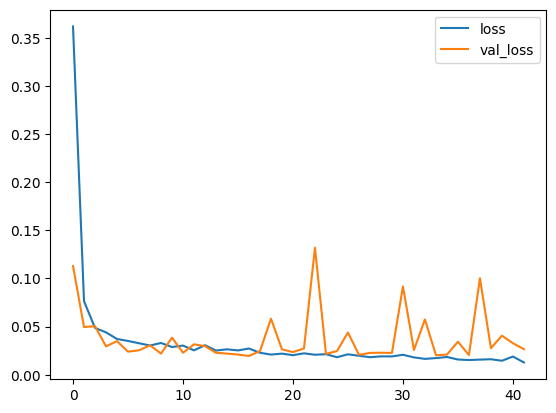

In [38]:
#plotting the train loss against the valiadation loss
model_loss= pd.DataFrame(model.history.history)
model_loss.plot()

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


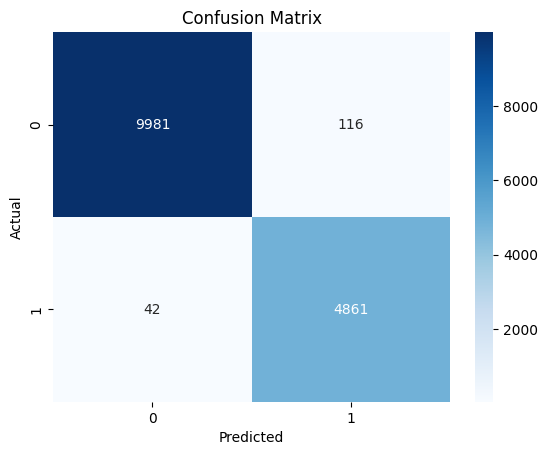

In [40]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test).round()
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10097
           1       0.98      0.99      0.98      4903

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [42]:
from sklearn.metrics import roc_auc_score

print("AUC Score:", roc_auc_score(y_test, y_pred))


AUC Score: 0.9899726275361503


In [43]:
import pickle

# Save the model
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [44]:
with open('fraud_detection_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [45]:
import os

print("Current working directory:", os.getcwd())


Current working directory: C:\Users\DAN TECH


In [48]:

if 'fraud_detection_scaler.pkl' in os.listdir():
    print("Model file found!")
else:
    print("Model file not found.")


Model file found!
